## Support Vector Machine (SVM)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io.matlab import loadmat

%matplotlib inline

In [18]:
DATAPATH_1 = ('DataScience\data/ex6data1.mat')
DATAPATH_2 = ('DataScience\data/ex6data2.mat')
DATAPATH_3 = ('DataScience\data/ex6data3.mat')
DATA_SPAM_TRAIN = ('DataScience\data/spamTrain.mat')
DATA_SPAM_TEST = ('DataScience\data/spamTest.mat')

In [20]:
## function to plot data
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (20., 14.) #figure size
    
    pos = y[:, 0] == 1 
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

## SVM with small regularization parameter

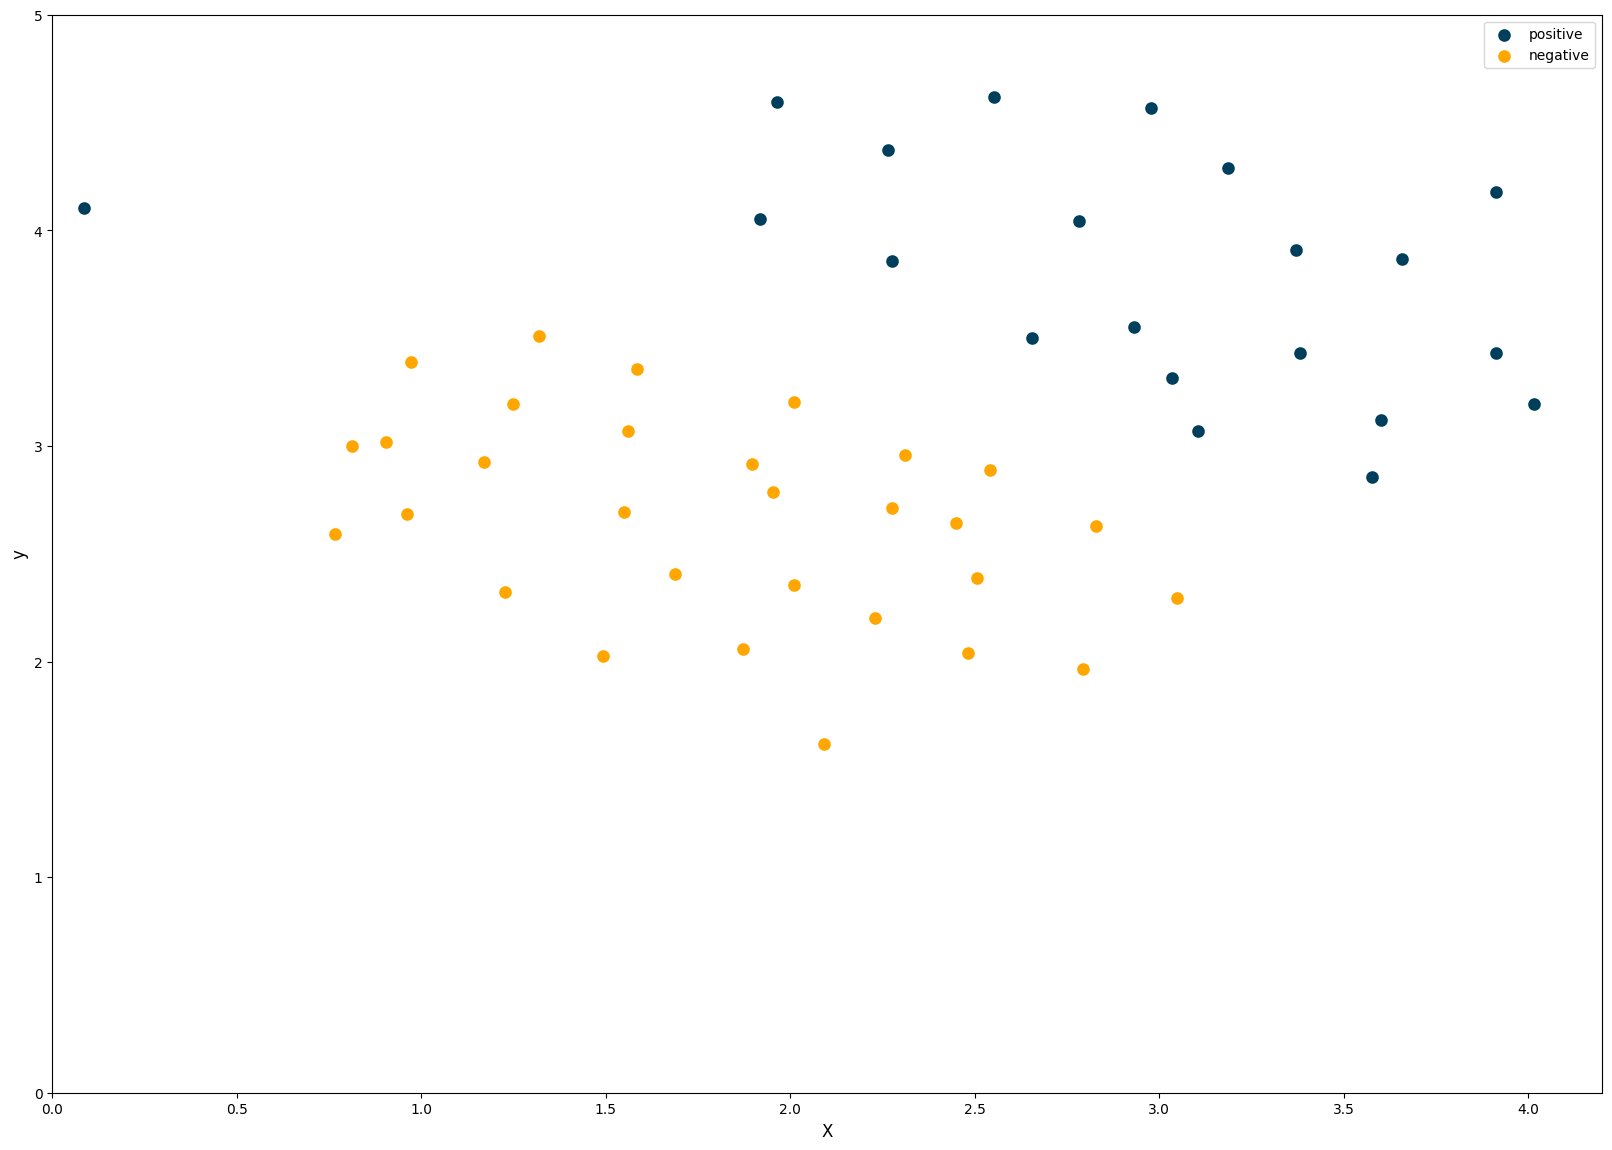

In [21]:
data1 = loadmat(DATAPATH_1)

X = data1['X']
y = data1['y']

plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

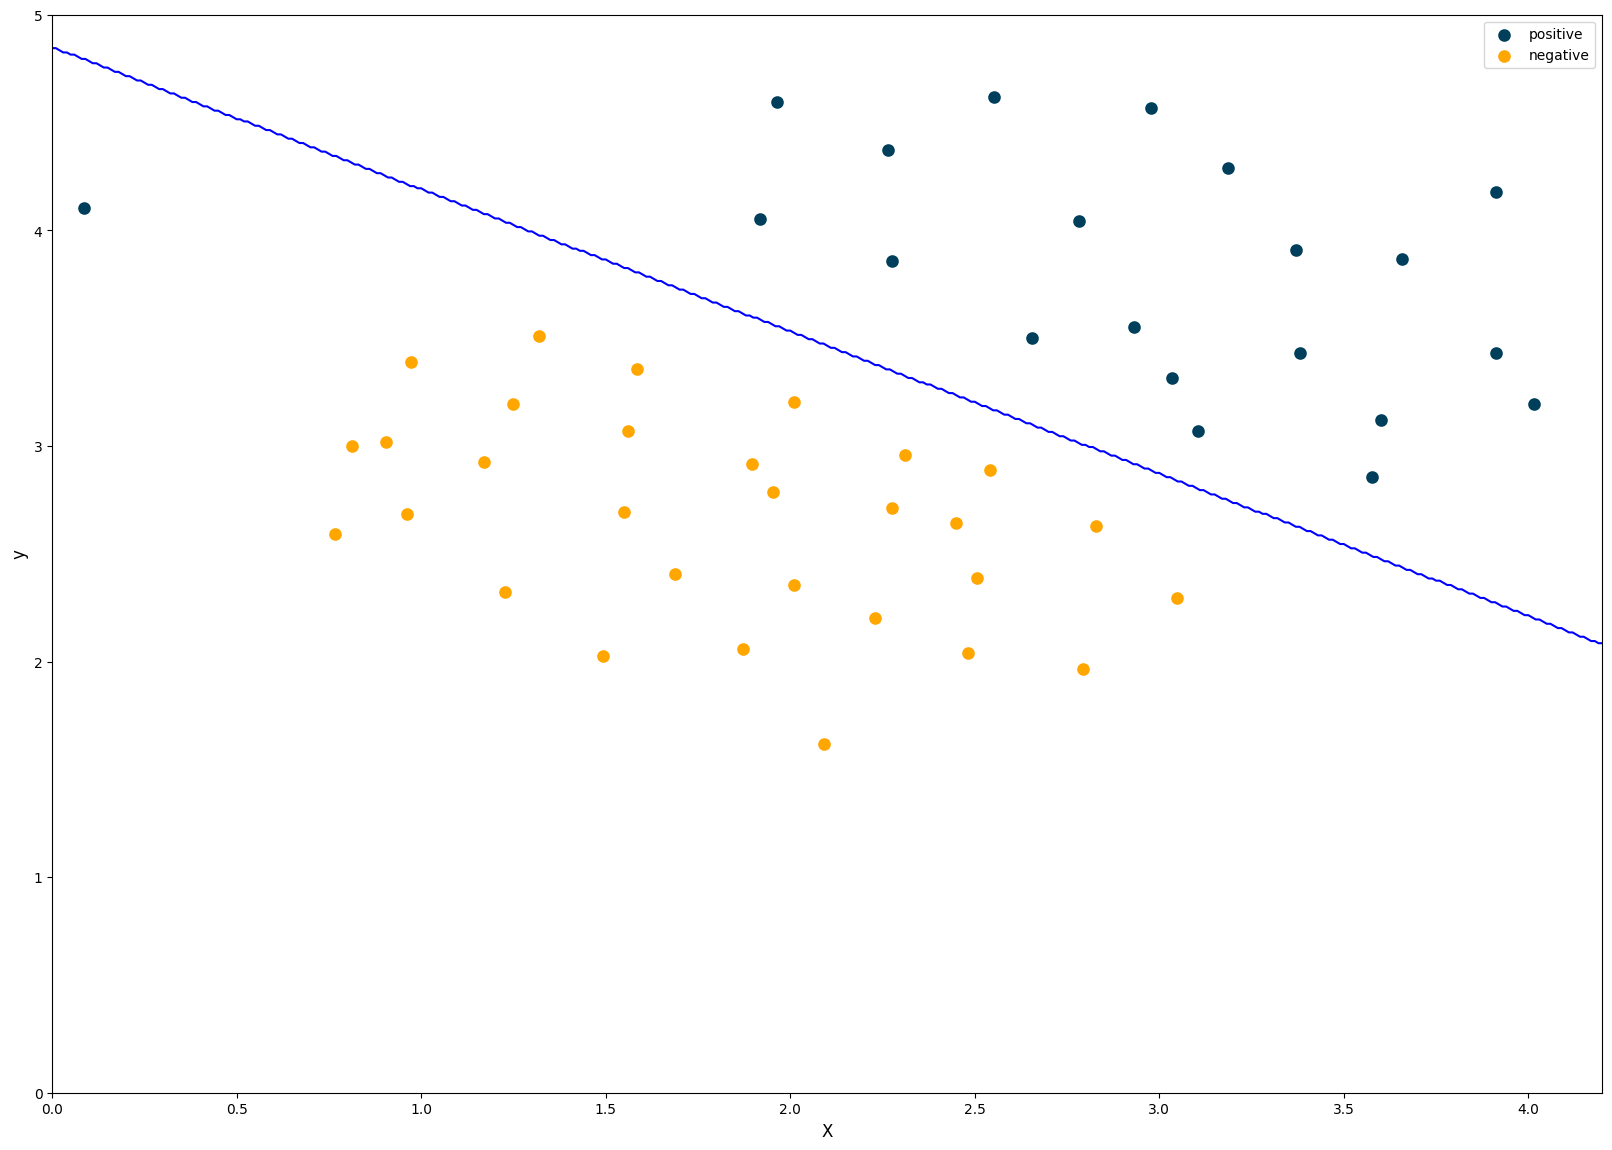

In [22]:
from sklearn import svm

#Use C=1, regularization parameter
clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape = 'ovr')
clf.fit(X, y.ravel())

#plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

## SVM with large regularization paramter

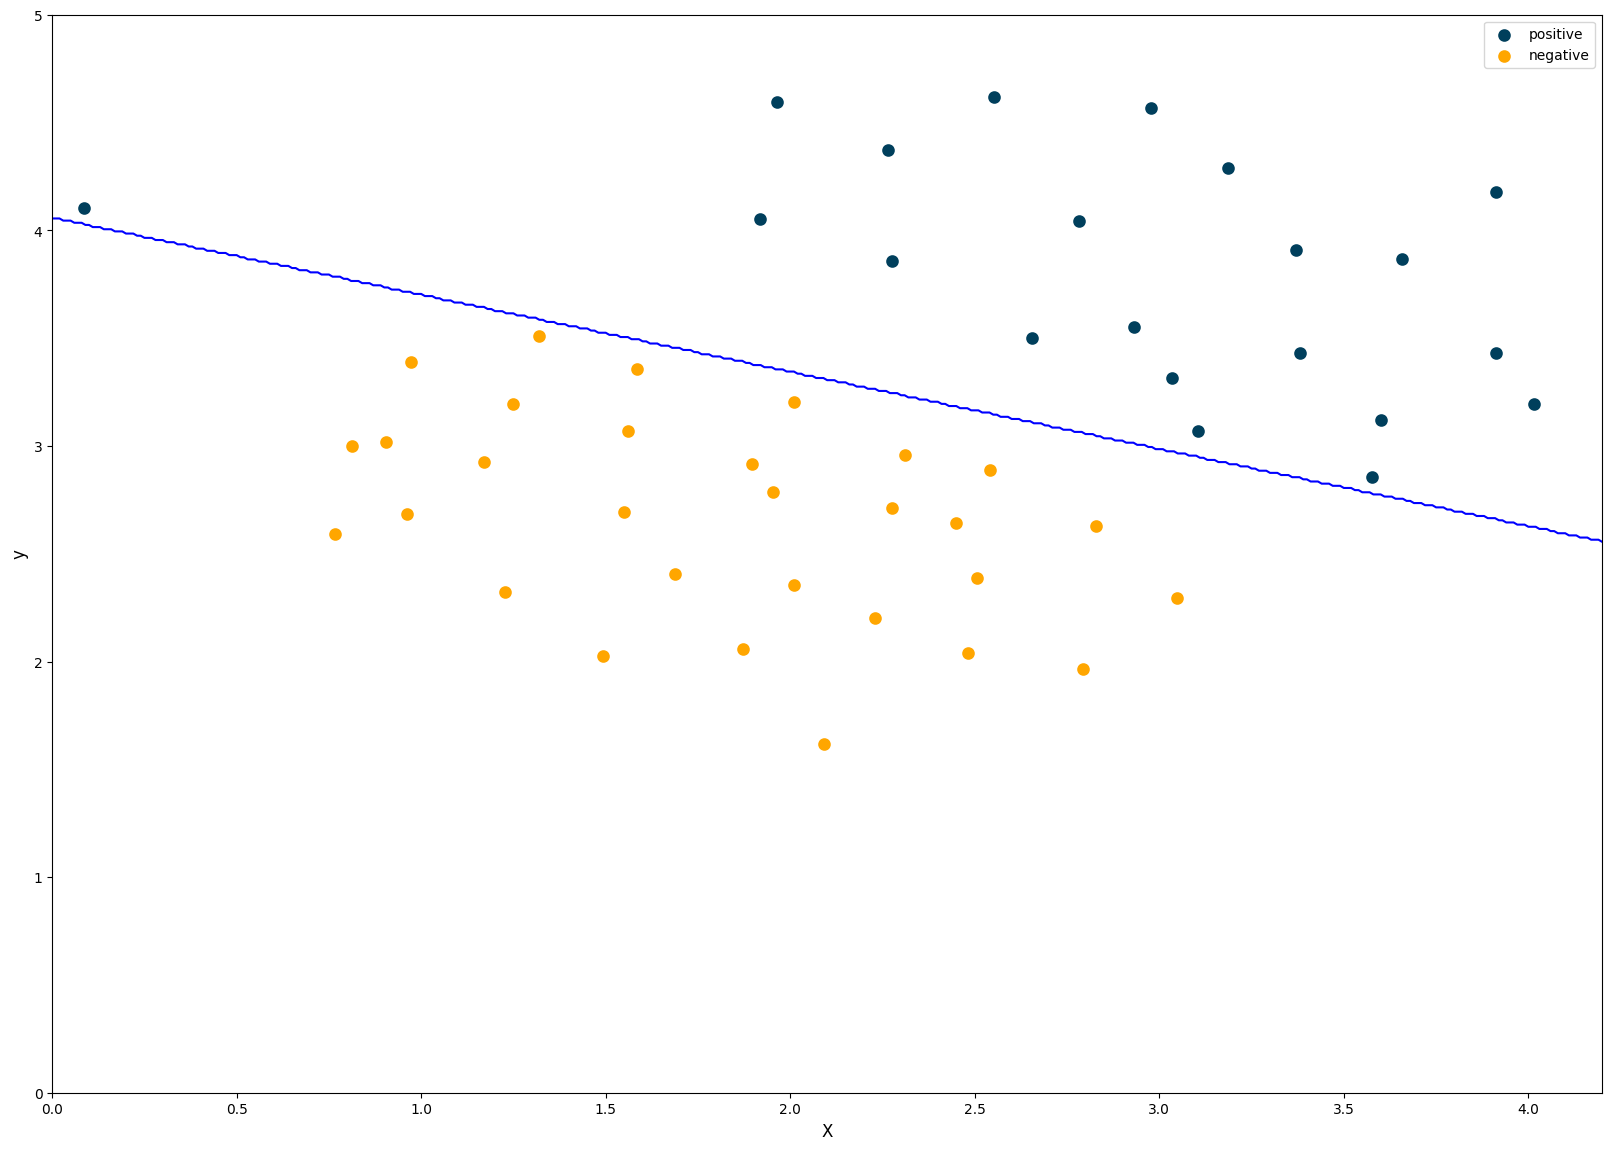

In [23]:
## propably over fitting
#Use C=100
clf100 = svm.SVC(kernel='linear', C=100.0, decision_function_shape='ovr')
clf100.fit(X, y.ravel())

#Plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#Plot hyperplane

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf100.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

## SVM with non-linear boundary

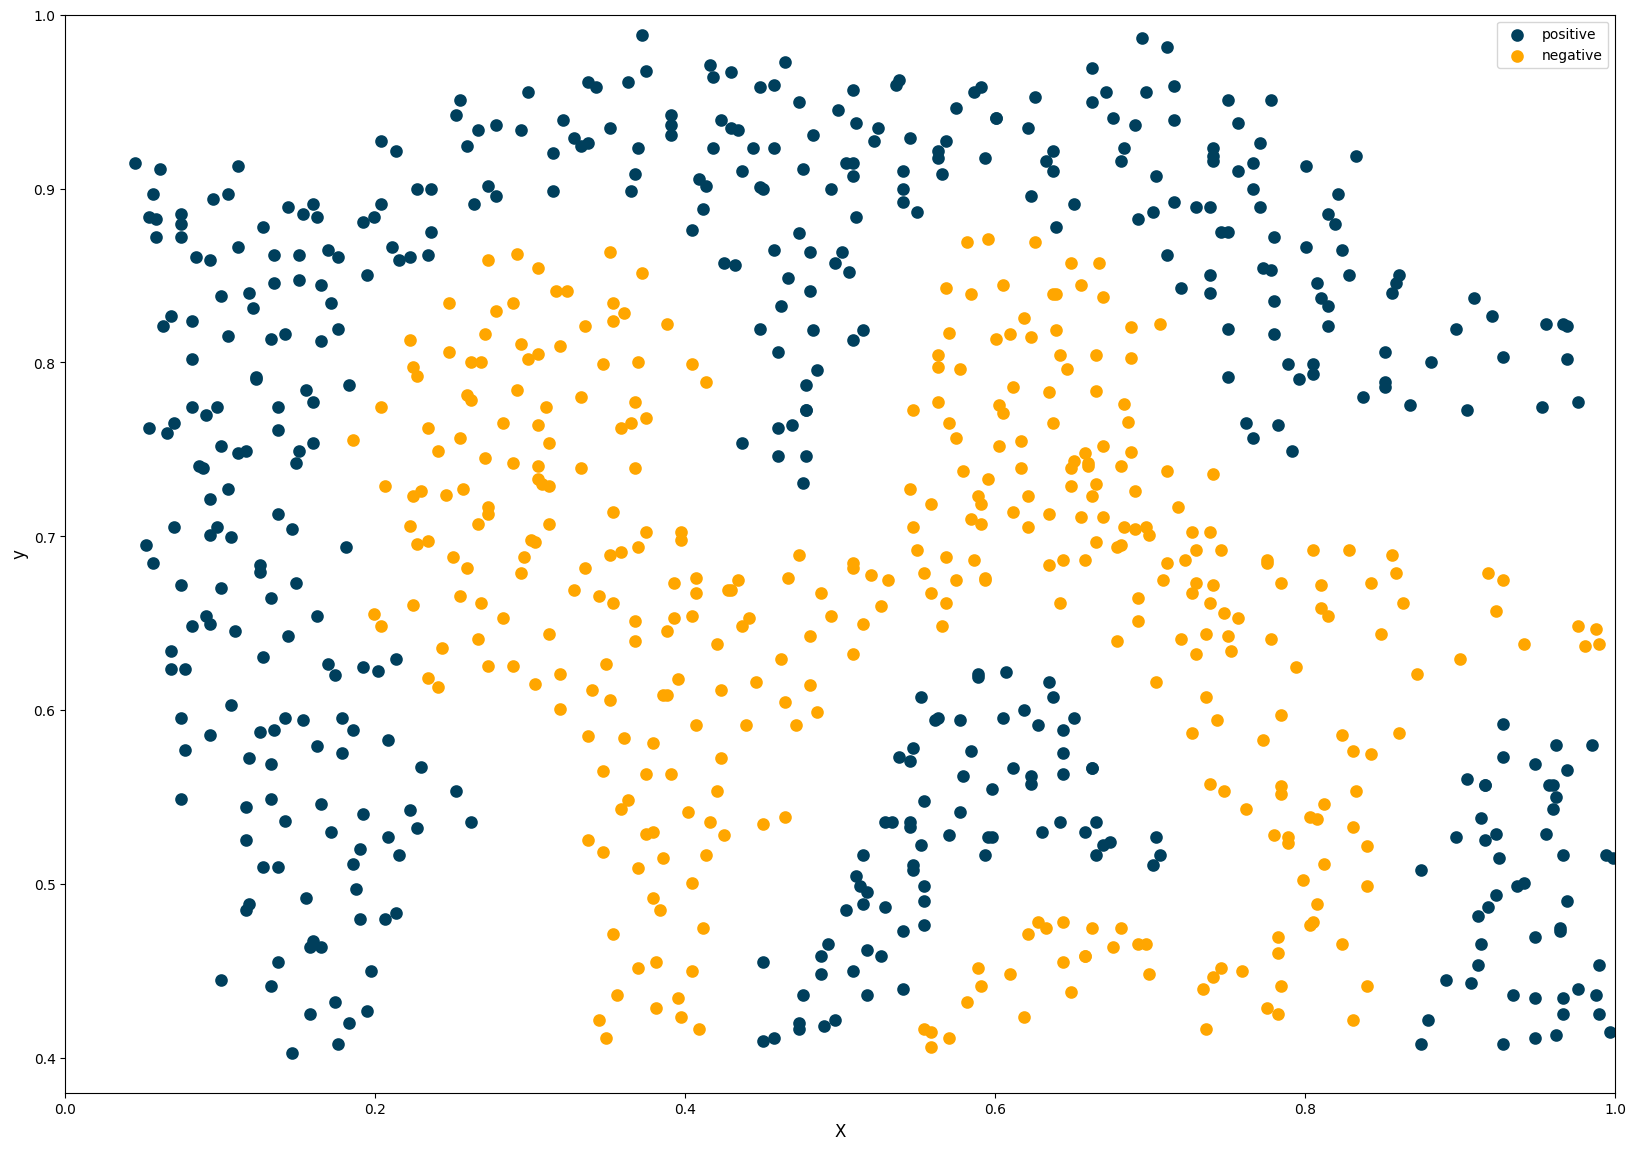

In [24]:
data2 = loadmat(DATAPATH_2)

X_2 = data2['X']
y_2 = data2['y']

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1)

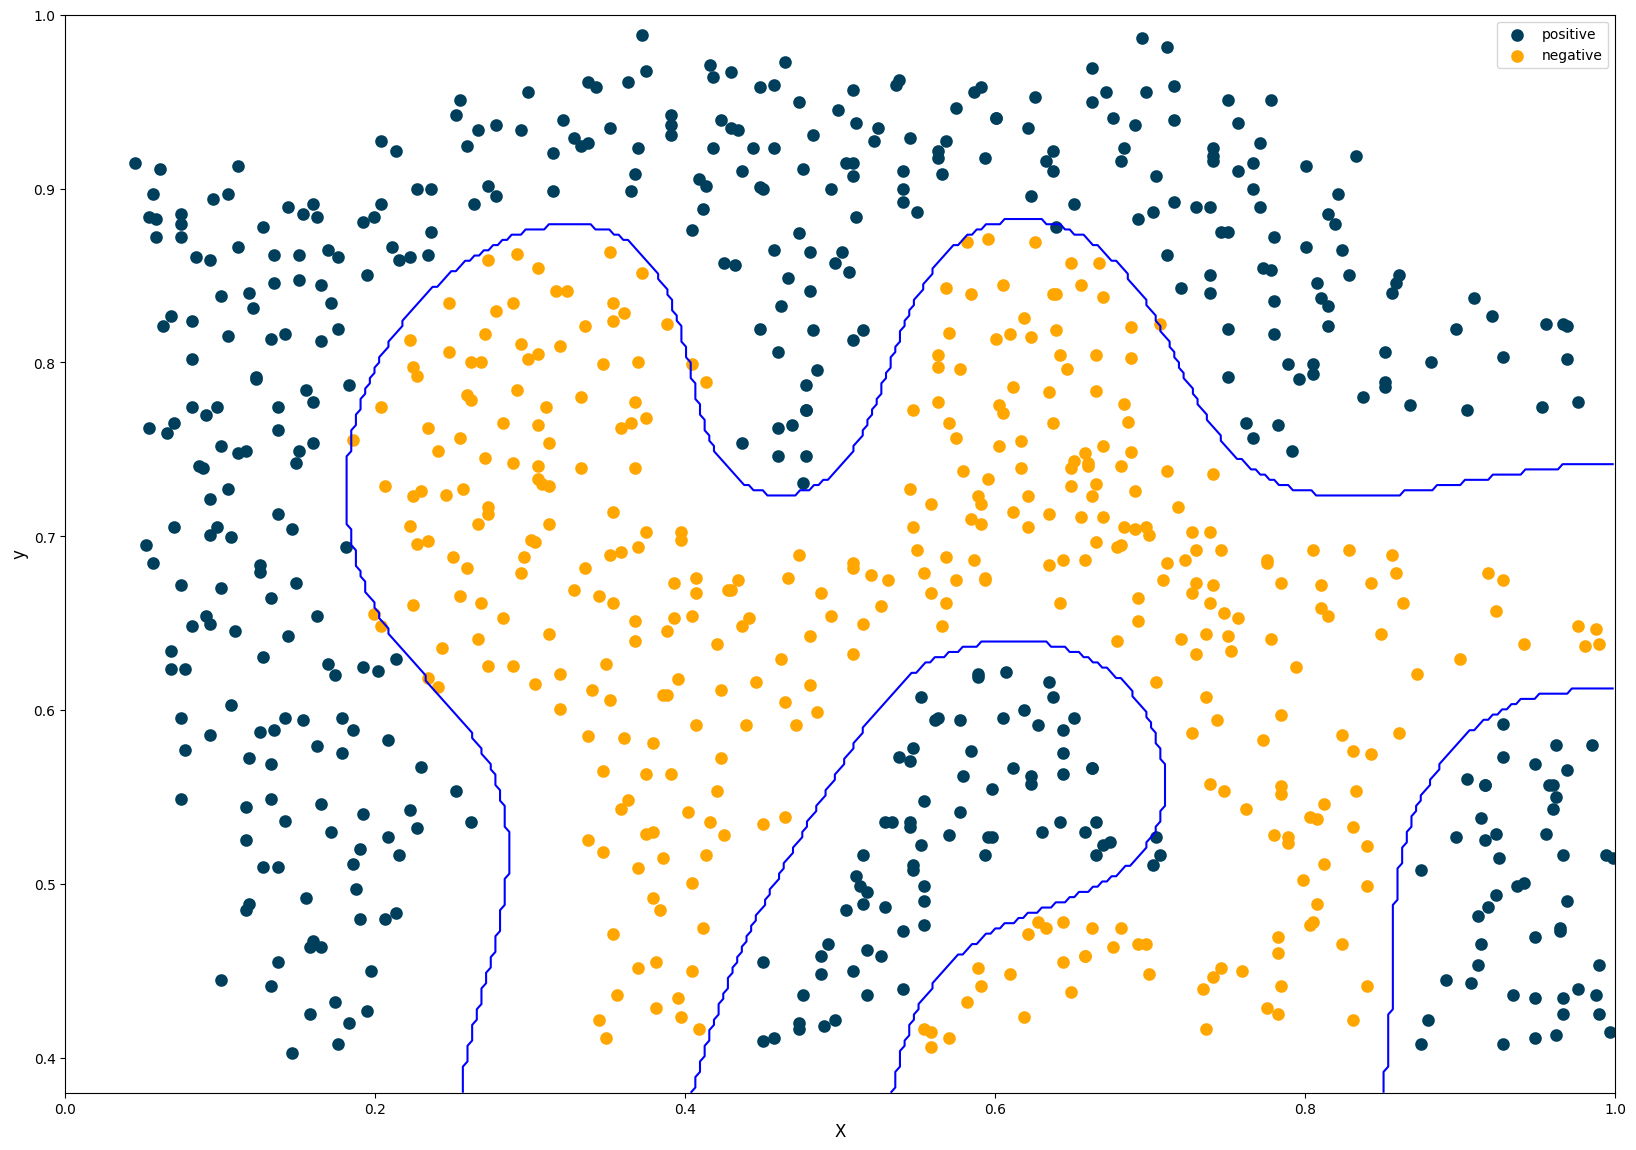

In [25]:
sigma = 0.1
gamma = 1/(2 * sigma**2) # specifies how far the influen of a data point reaches

clfg = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X_2, y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

## SVM with cross-validation

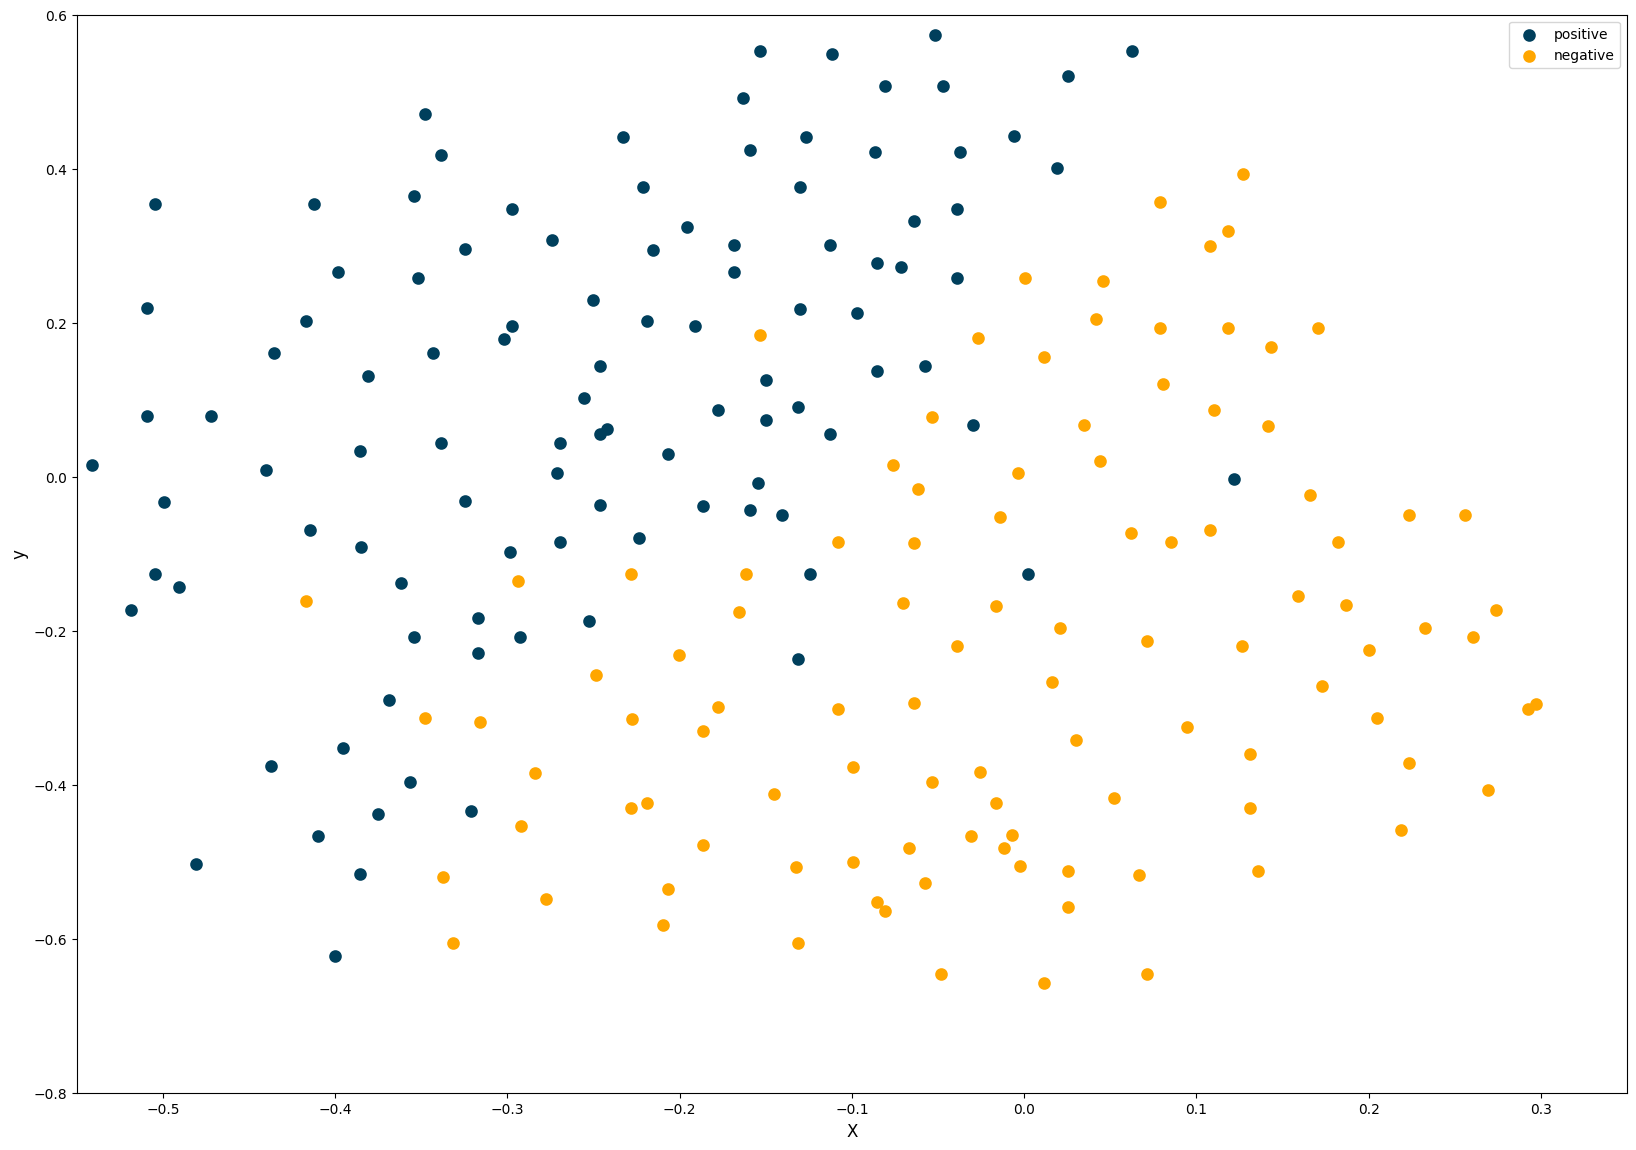

In [27]:
data3 = loadmat(DATAPATH_3)

X_3 = data3['X']
y_3 = data3['y']

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

In [28]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel='rbf', gamma = 1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        clf.fit(X_3, y_3.ravel())
        errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
        sigma_c.append((each, each_c))

In [29]:

index = np.argmax(errors)

sigma_max, c_max = sigma_c[index]

print('The optimal value of sigma is: {}'.format(sigma_max))
print('The optimal value of C is: {}'.format(c_max))

The optimal value of sigma is: 0.1
The optimal value of C is: 1


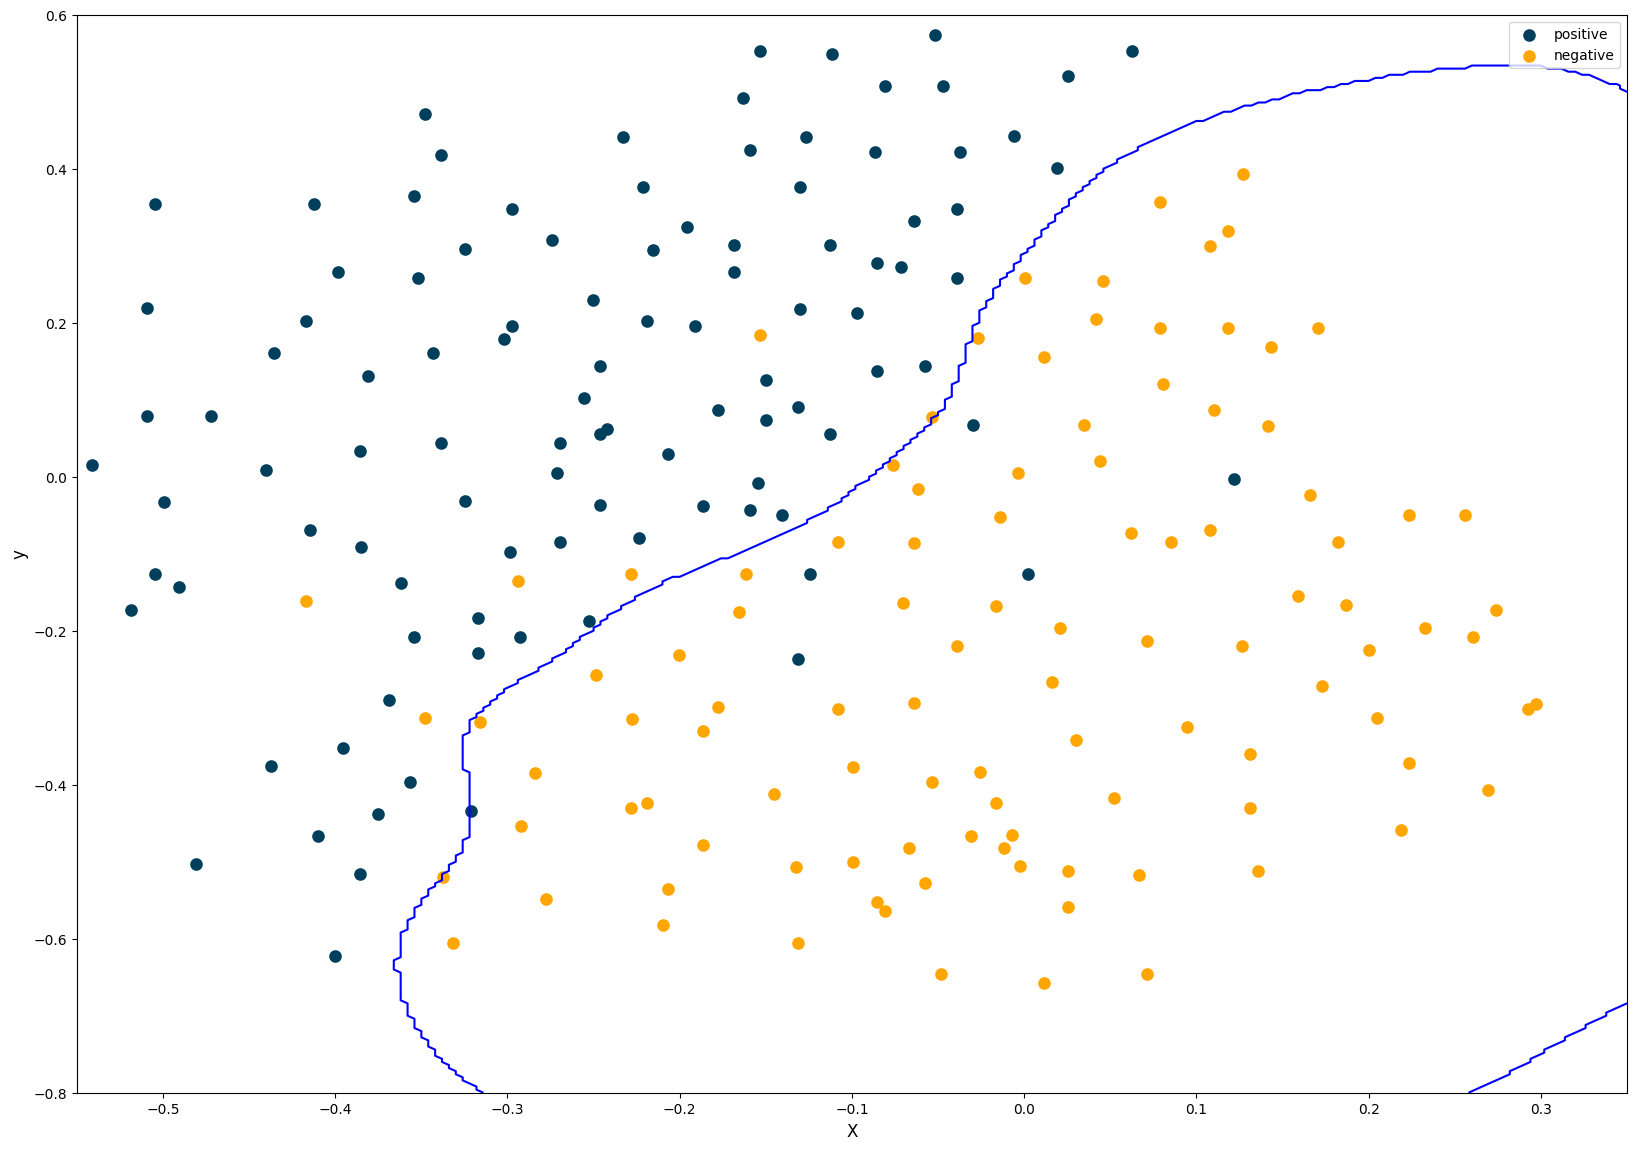

In [30]:
sigma= 0.1
gamma = 1/(2*(sigma**2))

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

## Spam classification

In [31]:
spam_train = loadmat(DATA_SPAM_TRAIN)
spam_test = loadmat(DATA_SPAM_TEST)

C = 0.1

X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']

clf_spam = svm.SVC(kernel = 'linear', C = 0.1, decision_function_shape = 'ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.825
Test accuracy = 98.9
